In [56]:
# Importing the pandas module
import pandas as pd

#Visualize
import seaborn as sns

# Reading in the data
df = pd.read_csv('data/exams.csv')

# Take a look at the first datapoints
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

In [57]:
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Create average reading scores with groupby test_prep_course column

In [58]:
avg_read = df.reading.groupby(df.test_prep_course).mean()
avg_read

test_prep_course
completed    73.893855
none         66.534268
Name: reading, dtype: float64

We can see that from avg_read, the average reading scores for students with the preparation course is 73.893855 and the average reading scores for students without the preparation course is 66.534268

Create average scores column and group it by parent_education_level column

In [59]:
cols = ['math', 'reading', 'writing']
df['avg_score'] = df[cols].mean(axis=1)
avg_scores = df.avg_score.groupby(df.parent_education_level).mean()
avg_scores

parent_education_level
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: avg_score, dtype: float64

We can see that from avg_scores, the average scores for students with parent that have :
- associate's degree is 69.569069
- bachelor's degree is 71.923729
- high school is 63.096939
- master's degree is 73.598870
- some college is 68.476401
- some high school is 65.108007

Visualize the average reading scores for students with/without the test preparation course

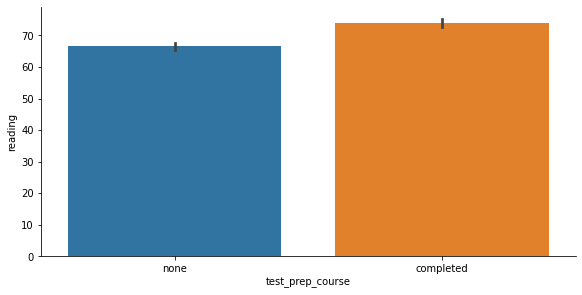

In [60]:
sns.catplot(x='test_prep_course', y='reading', data=df, kind='bar', height=4, aspect=2);

Visualize the average scores for the different parental education levels

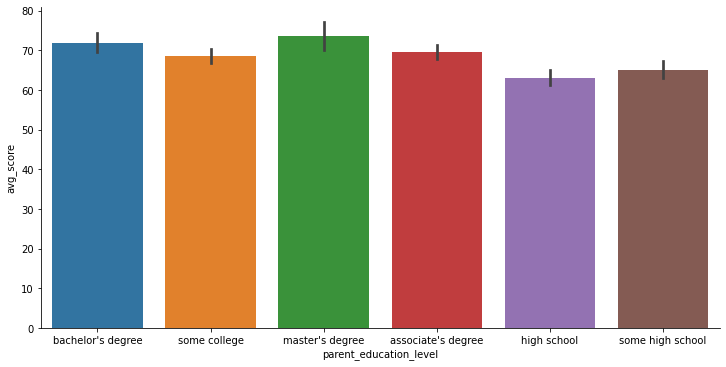

In [61]:
sns.catplot(x='parent_education_level', y='avg_score', data=df, kind='bar', height=5, aspect=2);

Visualize the average scores for students with/without the test preparation course for different parental education levels

In [62]:
import plotly.express as px
fig = px.bar(df, x="parent_education_level", y="avg_score", color="test_prep_course")
fig.show()

Correlations between scores

In [63]:
df[cols].corr()

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


Summarize
- the average reading scores for students with the preparation course is bigger than the average reading scores for students without the preparation course no matter what parent education level is
- The highest average score is the student whose parent have master's degree and the lowest average score is the student whose parent have high school
- There is positive correlation between scores